In [6]:
import fastai;fastai.__version__
import torch; torch.__version__
from fastai.tabular import * 
import pandas as pd

from sklearn.metrics import mean_absolute_error
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [7]:
df = pd.read_csv("./international_regression.csv",index_col=0)

In [8]:
X = df
for val in X.columns:
  try:
    X[val] = X[val].astype(np.double)
  except:
    print(val)

profile
name
holiday
mpaa


In [9]:
X = X.reset_index(drop=True)

X = X.loc[(X['Year']<2020)].reset_index(drop=True)

### FINE TUNE ONE FOLD

In [13]:
params = {
  'layers':[256, 128, 128, 64, 32, 32, 16, 16, 8, 8], 
  'metrics':[rmse],
  'emb_drop':.2,
  'ps' : [.1 for i in range(10)],
  'callback_fns':ShowGraph
}

In [14]:
# X = X.drop(columns=['year'])
procs = [FillMissing, Categorify, Normalize]
dep_var = 'box_office'
cat_names = df.columns.tolist()[3:][:4]

# test = (TabularList.from_df(test_df, cat_names=cat_names, procs=procs))

data = (TabularList.from_df(X, path='.', cat_names=cat_names, procs=procs)
                   .split_by_idx(valid)
                   .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                   .databunch())
# data.add_test(test)

# #define learner
# learn = tabular_learner(
#   data, **params)

# learn.lr_find()
# learn.recorder.plot()

NameError: name 'valid' is not defined

In [15]:
# learn.fit_one_cycle(20)

In [16]:
# # get predictions
# preds, targets = learn.get_preds(DatasetType.Test)
# labels = [np.exp(p[0].data.item()) for p in preds]

# # create submission file to submit in Kaggle competition
# submission = pd.DataFrame({'Name': test_name, 'ID': test_id, 'Y_Hat': labels, 'Y': test_bo})
# # submission.to_csv('submission.csv', index=False)
# submission.head()

### K FOLD VALIDATION

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,time
0,335.201447,328.228607,18.076323,00:00
1,334.975525,328.869843,18.093370,00:00
2,334.350616,328.251434,18.077156,00:00
3,333.493805,327.674774,18.064171,00:00
4,331.660522,323.118744,17.939083,00:00
5,328.268402,319.612671,17.843779,00:00
6,322.958557,310.110352,17.579321,00:00
7,314.703583,296.509186,17.190210,00:00
8,302.134369,273.333679,16.515892,00:00
9,284.266907,256.208984,15.991084,00:00


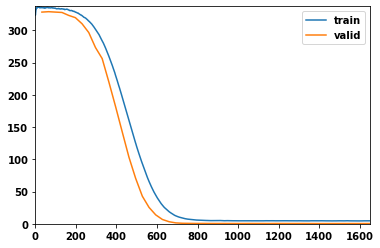

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,time
0,332.427277,337.218689,18.322065,00:00
1,332.234375,336.313568,18.298412,00:00
2,331.674011,334.897888,18.261007,00:00
3,330.954285,333.652740,18.227623,00:00
4,329.728302,331.508362,18.171701,00:00
5,327.369568,328.984039,18.105120,00:00
6,323.175446,316.095215,17.759853,00:00
7,316.094910,308.218536,17.540190,00:00
8,304.625122,287.809448,16.958349,00:00
9,287.868256,263.036255,16.209072,00:00


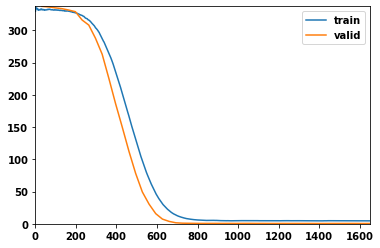

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,time
0,341.579926,333.439392,18.216700,00:00
1,341.499146,334.344910,18.243668,00:00
2,340.561005,333.517944,18.224939,00:00
3,339.545227,331.530304,18.171396,00:00
4,337.445923,328.993439,18.104557,00:00
5,334.670227,326.270599,18.039200,00:00
6,329.927185,315.051758,17.728924,00:00
7,321.887512,305.600983,17.472742,00:00
8,309.590912,286.248596,16.910273,00:00
9,292.174957,267.109741,16.331009,00:00


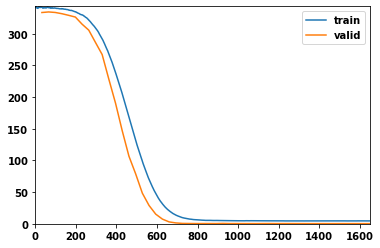

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,time
0,321.955322,321.416901,17.876953,00:00
1,321.686127,319.761108,17.831728,00:00
2,321.239471,318.768860,17.804829,00:00
3,320.362030,317.672089,17.775702,00:00
4,318.801636,316.918762,17.760118,00:00
5,315.968872,311.332245,17.601692,00:00
6,311.221954,300.761871,17.303469,00:00
7,303.430847,287.561340,16.920845,00:00
8,291.521362,270.008026,16.401932,00:00
9,274.519775,244.634369,15.617668,00:00


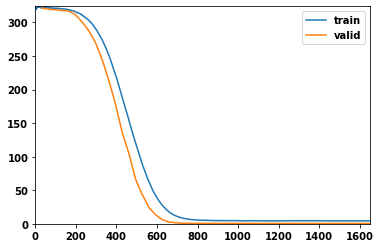

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,time
0,337.765137,344.969513,18.521606,00:00
1,337.160248,343.164001,18.473158,00:00
2,337.027496,342.480530,18.456322,00:00
3,336.155823,337.851715,18.338413,00:00
4,334.291077,331.345490,18.166386,00:00
5,331.693298,326.481873,18.035660,00:00
6,327.423279,320.760773,17.877365,00:00
7,319.926941,305.838837,17.461330,00:00
8,307.968475,285.483032,16.882797,00:00
9,290.500397,254.677567,15.952228,00:00


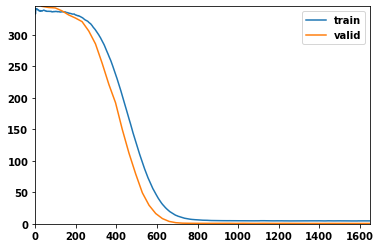

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,time
0,320.208252,316.880035,17.752520,00:00
1,319.487671,315.113525,17.703560,00:00
2,319.531586,314.694855,17.691525,00:00
3,319.038757,314.435455,17.685501,00:00
4,318.026978,313.512146,17.664021,00:00
5,315.782715,308.171570,17.513704,00:00
6,312.076965,303.293243,17.391262,00:00
7,305.674011,294.589783,17.138399,00:00
8,295.148224,273.517120,16.519375,00:00
9,279.159882,251.610443,15.847580,00:00


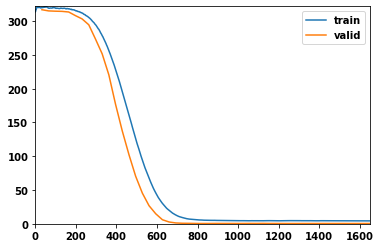

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,time
0,341.873810,336.894470,18.305548,00:00
1,341.317688,335.025513,18.259924,00:00
2,340.812164,333.455780,18.219772,00:00
3,339.926575,332.932861,18.207691,00:00
4,338.254700,331.485291,18.170221,00:00
5,335.558990,328.436432,18.091490,00:00
6,330.522919,319.872894,17.863348,00:00
7,322.780914,301.573792,17.340025,00:00
8,310.650696,289.038574,16.990406,00:00
9,293.314606,263.483154,16.221996,00:00


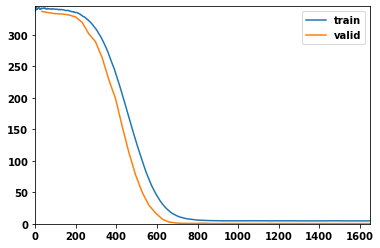

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,time
0,329.356720,334.832306,18.247976,00:00
1,328.705261,333.627472,18.215942,00:00
2,328.333221,333.925690,18.225523,00:00
3,327.266510,331.597015,18.164537,00:00
4,326.148163,328.683807,18.090393,00:00
5,323.858917,325.446198,18.001352,00:00
6,319.824493,316.675842,17.759769,00:00
7,313.132904,303.652618,17.394688,00:00
8,302.121582,282.208893,16.776268,00:00
9,285.757355,261.548248,16.148678,00:00


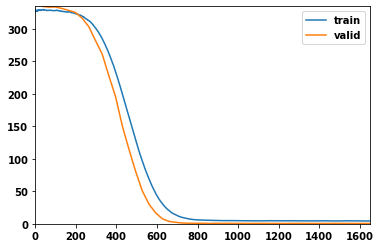

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,time
0,344.882080,342.146576,18.451845,00:00
1,344.251984,342.809906,18.471272,00:00
2,343.657013,341.344910,18.432703,00:00
3,342.337891,339.084320,18.372782,00:00
4,340.618713,335.163879,18.266184,00:00
5,337.655609,329.458069,18.111773,00:00
6,332.695282,322.574921,17.922846,00:00
7,324.577026,307.906311,17.515995,00:00
8,312.036011,287.807587,16.947544,00:00
9,294.416077,266.151917,16.305479,00:00


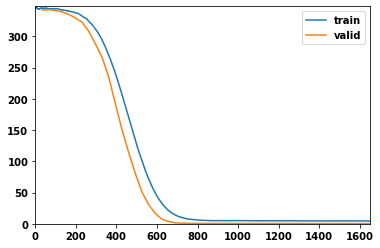

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,time
0,338.777557,336.028381,18.282099,00:00
1,338.118103,335.565613,18.270876,00:00
2,337.482727,334.426758,18.241280,00:00
3,336.650818,332.629669,18.192997,00:00
4,334.562561,329.478851,18.106026,00:00
5,331.296112,323.134735,17.934971,00:00
6,326.249390,316.164459,17.741951,00:00
7,318.031891,300.316589,17.298412,00:00
8,305.400452,282.883606,16.795965,00:00
9,287.617218,251.642395,15.850146,00:00


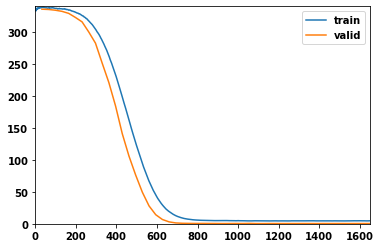

In [17]:
'''
  K-FOLD CROSS VALIDATION (K=10)
'''
from sklearn.model_selection import KFold

# X = X.drop(columns=['year'])
procs = [FillMissing, Categorify, Normalize]
dep_var = 'box_office'
cat_names = df.columns.tolist()[3:][:4]
continuous = df.columns.tolist()[7:]

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

validation_data = pd.DataFrame({
  'Name': ['nan'], 
  'ID': ['nan'], 
  'Y_Hat': ['nan'], 
  'Y': ['nan']})

for train_index, val_index in kfold.split(X, X['box_office']):
  data = TabularDataBunch.from_df('.', X.drop(columns=['name','profile']), dep_var, valid_idx=val_index, procs=procs, cat_names=cat_names, num_workers=0)
  #define learner
  learn = tabular_learner(
    data, 
    **params)
  
  learn.lr_find()

  learn.fit_one_cycle(50)

  #NEURAL NETWORK EVALUATION
  #VALIDATION SET METRICS
  
  test_preds=learn.get_preds(DatasetType.Valid)
  labels=np.exp(test_preds[0].data).numpy().T[0].tolist()
  
  result = pd.DataFrame({'Name': X.iloc[val_index]['name'], 'ID': X.iloc[val_index]['profile'], 'Y_Hat':labels , 'Y': test_preds[1]})
  validation_data = validation_data.append(result,ignore_index=True)

In [ ]:
validation_data = validation_data.iloc[1:].reset_index(drop=True)

In [19]:
validation_data['Y_Hat']=np.exp(validation_data['Y_Hat'].values.tolist())

In [22]:
mean_absolute_percentage_error(validation_data['Y'].values.tolist(),validation_data['Y_Hat'].values.tolist())

58.51658053948252

In [28]:
mean_absolute_error(validation_data['Y_Hat'].values.tolist(),validation_data['Y'].values.tolist())

76408197.6602908